In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2023-03-14 21:12:39.667908: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-14 21:12:39.771344: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-14 21:12:39.773884: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 21:12:42.230343: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('../data/train/train-dynamic.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'bad': 0, 'deaf': 1, 'fine': 2, 'good': 3, 'goodbye': 4, 'hello': 5, 'hungry': 6, 'j': 7, 'me': 8, 'no': 9, 'please': 10, 'sorry': 11, 'thankyou': 12, 'yes': 13, 'you': 14, 'z': 15}
(480000, 11) (480000, 16)
(3200, 150, 11) (3200, 150, 16)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2400, 150, 11) (800, 150, 11)
(2400, 150, 16) (800, 150, 16)


In [4]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True))
model.add(Dense(units=len(label_dict), activation='softmax'))
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20


2023-03-14 21:12:50.563651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-14 21:12:50.576448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-14 21:12:50.584332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 2.2874 - accuracy: 0.2873

2023-03-14 21:13:01.897780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-14 21:13:01.901925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-14 21:13:01.904934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 14s 118ms/step - loss: 2.2874 - accuracy: 0.2873 - val_loss: 1.7966 - val_accuracy: 0.4886
Epoch 2/20
75/75 [==============================] - 10s 130ms/step - loss: 1.4964 - accuracy: 0.5563 - val_loss: 1.3143 - val_accuracy: 0.6369
Epoch 3/20
75/75 [==============================] - 10s 134ms/step - loss: 1.1491 - accuracy: 0.6660 - val_loss: 1.0305 - val_accuracy: 0.7208
Epoch 4/20
75/75 [==============================] - 12s 166ms/step - loss: 0.8998 - accuracy: 0.7560 - val_loss: 0.8559 - val_accuracy: 0.7642
Epoch 5/20
75/75 [==============================] - 12s 164ms/step - loss: 0.7380 - accuracy: 0.7966 - val_loss: 0.7188 - val_accuracy: 0.7998
Epoch 6/20
75/75 [==============================] - 12s 156ms/step - loss: 0.6123 - accuracy: 0.8329 - val_loss: 0.6049 - val_accuracy: 0.8203
Epoch 7/20
75/75 [==============================] - 12s 155ms/step - loss: 0.5168 - accuracy: 0.8586 - val_loss: 0.5358 - val_accuracy: 0.8389
Epoch 8/20

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (32, 150, 64)             19456     
                                                                 
 dense (Dense)               (32, 150, 16)             1040      
                                                                 
Total params: 20,496
Trainable params: 20,496
Non-trainable params: 0
_________________________________________________________________


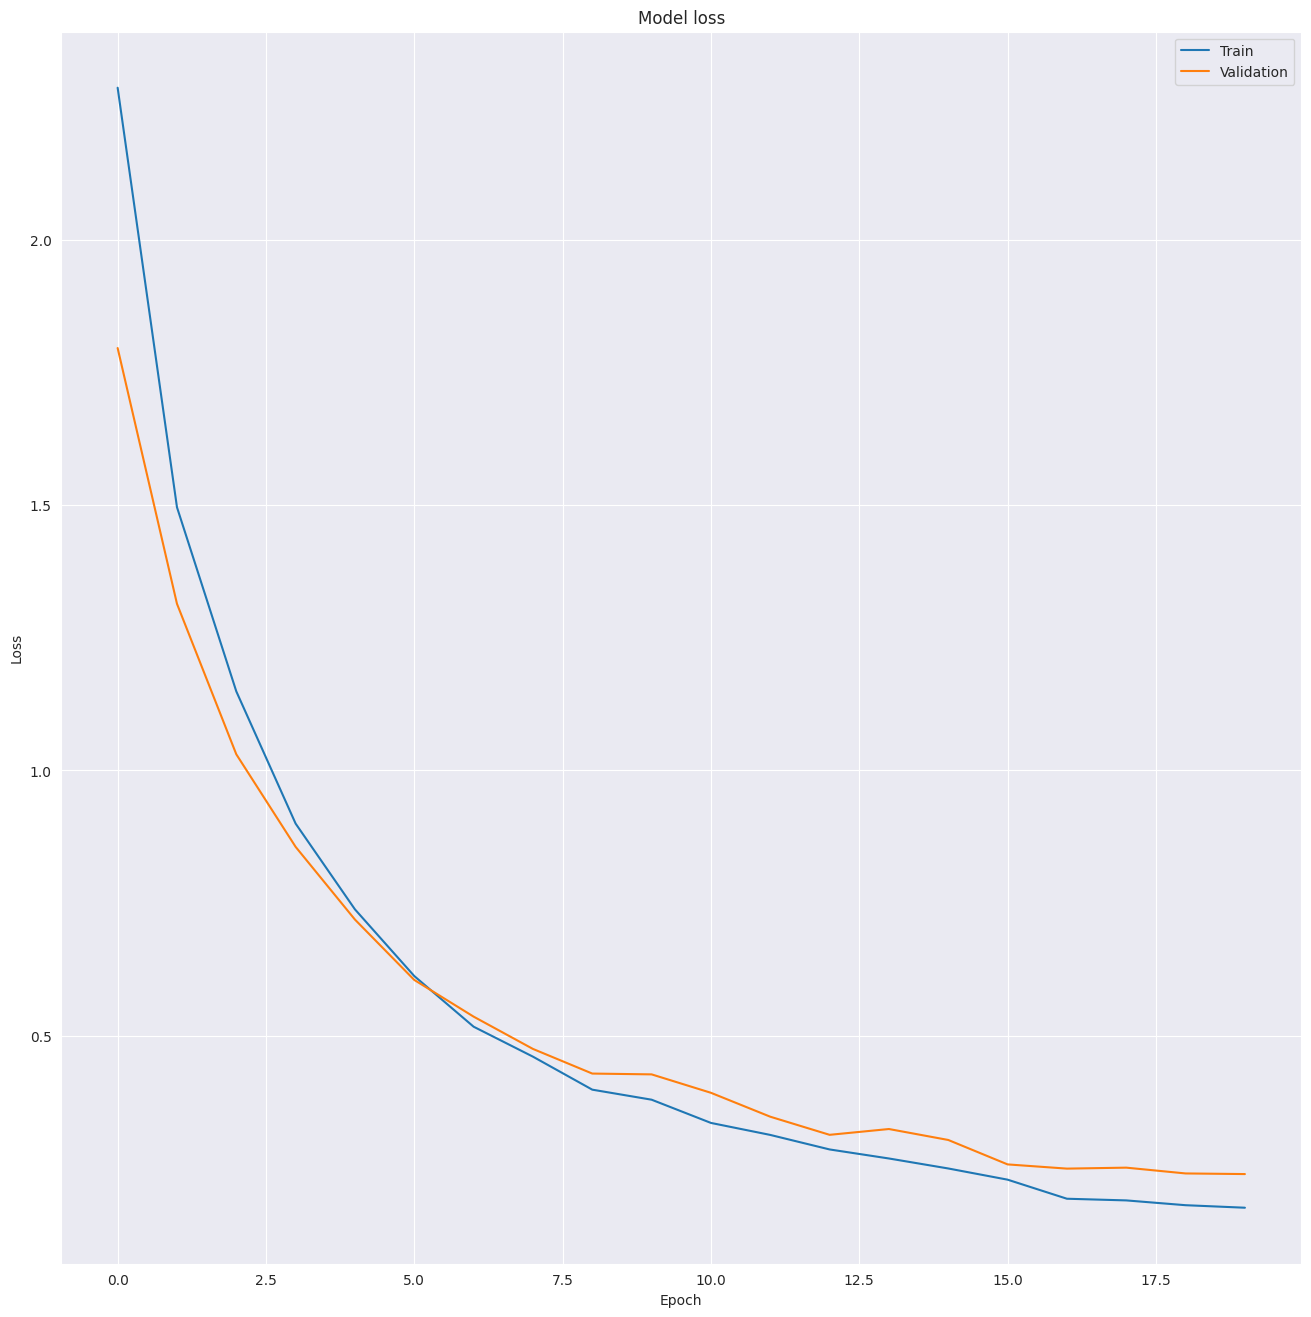

In [6]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

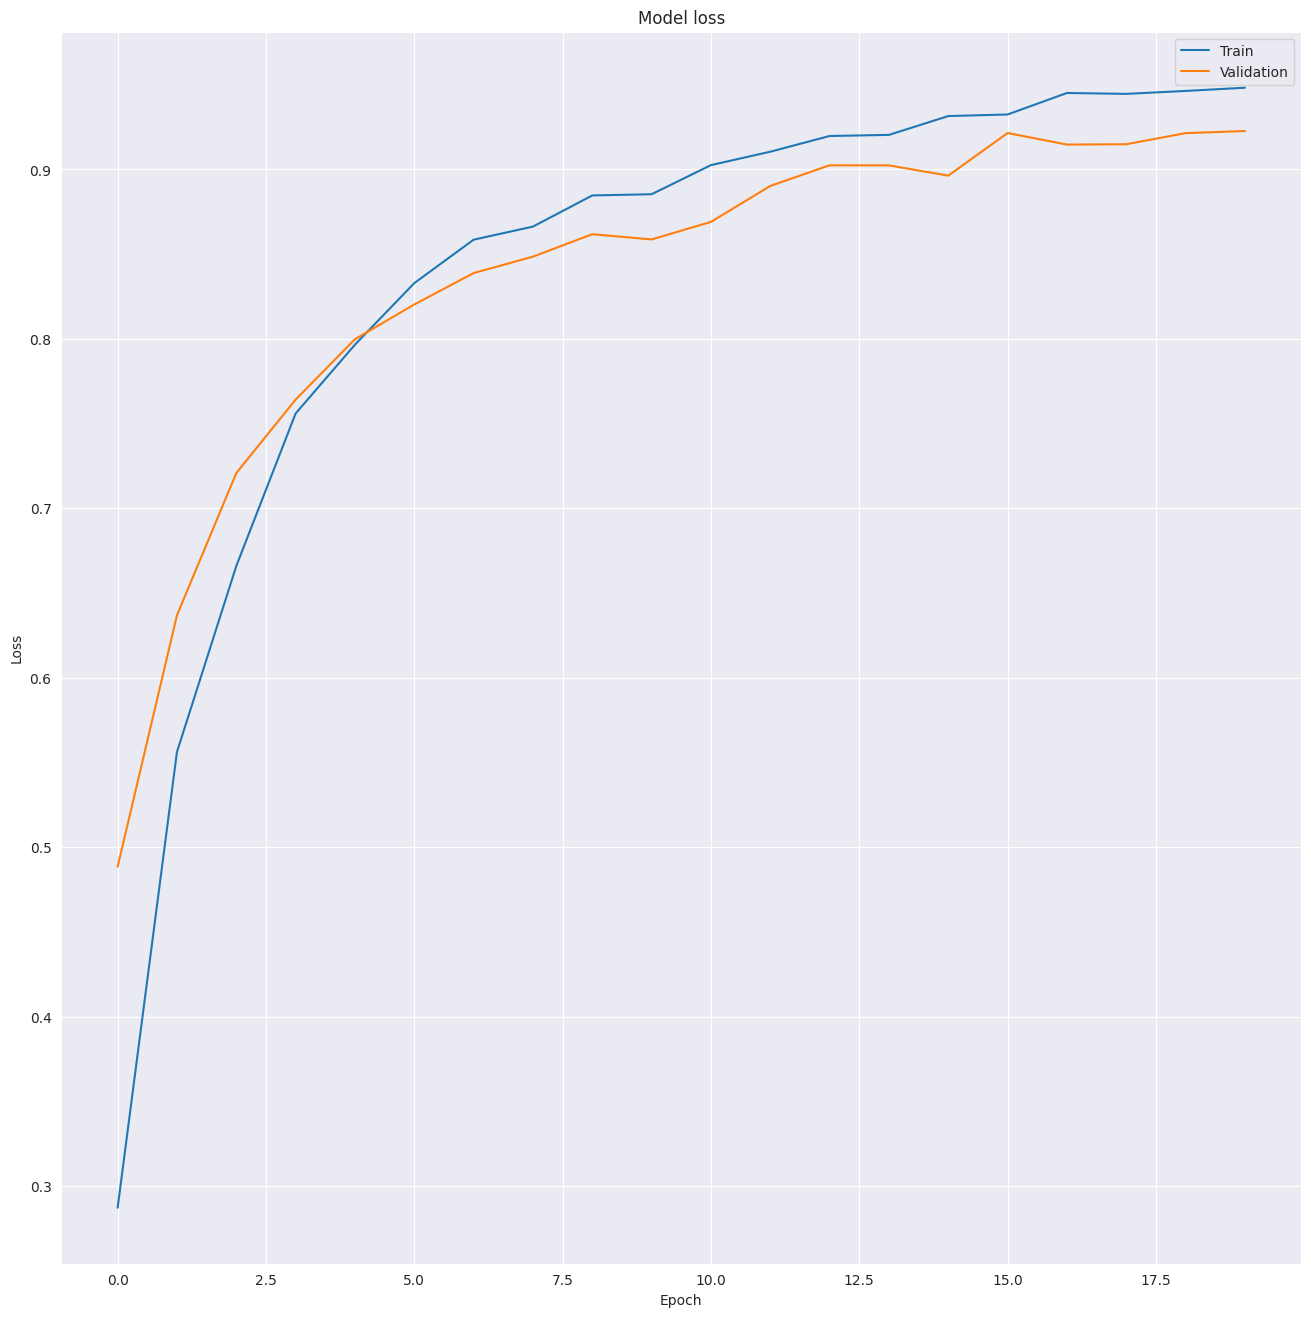

In [7]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [8]:
model.save('../models/dynamic.h5')